# Divya BM

# Prediction using Unsupervised ML

## K means Clustering


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

#reading the data
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
# to find the optimum number of clusters for K-means classification

x=iris_df.iloc[:,[1,2,3]].values

from sklearn.cluster import KMeans
squares=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k.fit(x)
    squares.append(k.inertia_)

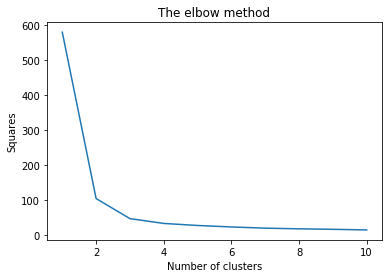

In [14]:
# To plot the results onto a 2D graph

plt.plot(range(1,11),squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Squares') #within cluster sum of squares
plt.show()

From the above graph it is clear that optimum clusters is at the elbow. This is when the within cluster sum of squares doesn't decrease significantly with every iteration.
From this we choose the number of clusters as ** '3**'.

In [15]:
# applying k-means to dataset

k=KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=10,random_state=0)
y=k.fit_predict(x)

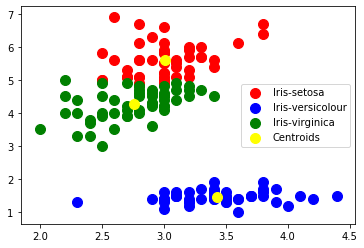

In [16]:
# visualising the clusters

plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()